### Group Project: Identifying Gender from Voice Features
#### Travis Stenerson and Darren Abramson
#### Sep. 30, 2016
------

This is an analysis of data that is available and described [here](http://www.primaryobjects.com/2016/06/22/identifying-the-gender-of-a-voice-using-machine-learning/) and [here](https://www.kaggle.com/primaryobjects/voicegender). 

The data consists of 21 attribute vectors consisting of 20 acoustic properties and a gender label of 3168 voice recordings. Exactly 50% of of the vectors are labeled female and 50% male. 

The goal is to identify gender via machine learning binary classifiers. We used multiple classifiers and altered hyperparameters to raise our identification ratefor this data set. Our best result was with the AdaBoost classifier. We achieved a mean of 98.1% accuracy on a test set, which was held out during parameter and hyperparameter tuning.

Below is our code, output and results. Included is a grid plot of each feature, comparing male and female recordings for that feature in a violin plot. 




### Read in data and examine structure

In [3]:
import pandas as pd

voice_data = pd.read_csv('voice.csv')

print voice_data.shape
voice_data.head(5)

(3168, 21)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### Split into features and labels

Notice that we use the `train_test_split` function *twice*: the first time is to separate a final, untouchable test set, and later, when training classifiers, we will use it a second is to split into test and validate sets. 

In [4]:
labels = voice_data['label']
features = voice_data.drop('label', 1)


print list(features.columns.values)

from sklearn.cross_validation import train_test_split
features_temp, features_test, labels_temp, labels_test = \
    train_test_split(features, labels, test_size=0.1, random_state=42)

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']


### Plotting features

The width of the plot is the density at that y-value, while the dark bar within the plot is the mea
n and standard deviation. Notable is the significant difference between males and females with the `meanfun` attribute, which is the mean fundamental frequency. `meanfun`, when fed into a Gaussian binary classifier as a single attribute vector, can identify the gender with 95% accuracy (see results below).

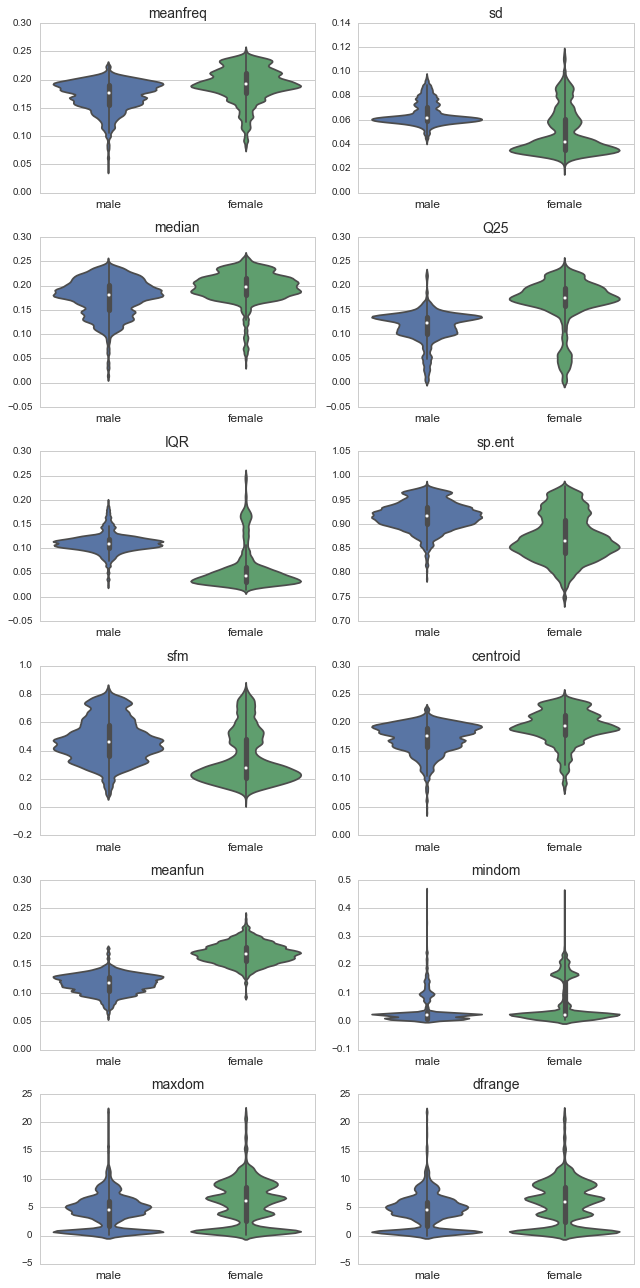

In [57]:
%matplotlib inline
numberOfPlots = 12
labelColumnName = 'label'

from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=numberOfPlots)
selectedFeatures = selector.fit(features_train, labels_train)

feature_names = [list(features.columns.values)[i] for i in selectedFeatures.get_support(indices=True)]
    
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

sns.set_style("whitegrid")

gs = gridspec.GridSpec(int(numberOfPlots/2), 2)

fig = plt.figure(figsize = (9,18))

n = 0
for i in feature_names:  
    ## change plot type here
    plt.subplot(gs[n])
    ax = sns.violinplot(x=labelColumnName, y=i, data = voice_data, bw=.1, scale="count")
    ax.set_title(i)
    ax.title.set_fontsize(14)
    plt.rcParams['xtick.labelsize'] = 12
    ax.set_xlabel("")
    ax.set_ylabel("")
    
    n=n+1;
gs.tight_layout(fig)

### Make a classifier, fit it to some training data, and examine its accuracy via validation data.

Notice that we use the `train_test_split` function *twice*: the first time is to separate a final, untouchable test set, and later, when training classifiers, we will use it a second is to split into test and validate sets. 

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

gnb = GaussianNB()
dct = DecisionTreeClassifier(random_state=1337, max_depth=10)
svc = SVC()

clf = gnb
    
from sklearn.cross_validation import train_test_split
features_train, features_val, labels_train, labels_val = \
    train_test_split(features_temp, labels_temp, test_size=0.3, random_state=42)

from time import time

#print len(features_train)
#print len(labels_train)

#print features_train[0]
#print labels_train[0]

# Train classifier on train features and train labels
# Measure and print the time taken
t0 = time()
clf = clf.fit(features_train, labels_train)
print "training time:", "\t\t", round(time()-t0, 3), "s"
c
pred = clf.predict(features_val)

from sklearn.metrics import confusion_matrix

print confusion_matrix(labels_val, pred, labels=["female", "male"])

# Report accuracy
from sklearn.metrics import accuracy_score
print "accuracy score:", "\t", accuracy_score(labels_val, pred)

training time: 		0.003 s
[[378  56]
 [ 34 388]]
accuracy score: 	0.894859813084


### Performance using Gaussian Naive Bayes on all features

As can be seen above, a simple classifier performs much better than chance on the validation data.

In [8]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(random_state=1337, max_depth=10)

clf = dct
    
from time import time

t0 = time()
clf = clf.fit(features_train, labels_train)
print "training time:", "\t\t", round(time()-t0, 3), "s"

pred = clf.predict(features_val)

from sklearn.metrics import confusion_matrix

print confusion_matrix(labels_val, pred, labels=["female", "male"])

# Report accuracy
from sklearn.metrics import accuracy_score
print "accuracy score:", "\t", accuracy_score(labels_val, pred)

training time: 		0.027 s
[[412  22]
 [ 17 405]]
accuracy score: 	0.954439252336


### Performance using a decision tree classifier on all features

A decision tree with max depth of 10 does very well on the data. What's going on? Next we look at the best features.

In [4]:
from sklearn.feature_selection import SelectKBest

kbest = 7

selector = SelectKBest(k=kbest)
selectedFeatures = selector.fit(features_train, labels_train)

feature_names = [list(features.columns.values)[i] for i in selectedFeatures.get_support(indices=True)]

print feature_names

kbestlabels = voice_data[feature_names]

kbestlabels.head(5)

['sd', 'Q25', 'IQR', 'sp.ent', 'sfm', 'centroid', 'meanfun']


,sd,Q25,IQR,sp.ent,sfm,centroid,meanfun
0,0.064241,0.015071,0.075122,0.893369,0.491918,0.059781,0.084279
1,0.067310,0.019414,0.073252,0.892193,0.513724,0.066009,0.107937
2,0.083829,0.008701,0.123207,0.846389,0.478905,0.077316,0.098706
3,0.072111,0.096582,0.111374,0.963322,0.727232,0.151228,0.088965
4,0.079146,0.078720,0.127325,0.971955,0.783568,0.135120,0.106398


### meanfun is the best feature

Above we have selected the 7 best features. It turns out that 'mean fundamental frequency', which is the average lowest frequency (similar to the 'main note' a monophonic instrument plays) is the single feature that predicts the most variance in the male/female label.

### Testing a model using only the best feature

In [12]:
t0 = time()
clf=gnb
features_train_best = features_train[['meanfun']]

clf = clf.fit(features_train_best, labels_train)

print "training time:", "\t\t", round(time()-t0, 3), "s"

pred = clf.predict(features_val[['meanfun']])

from sklearn.metrics import confusion_matrix

print confusion_matrix(labels_val, pred, labels=["female", "male"])

# Report accuracy
from sklearn.metrics import accuracy_score
print "accuracy score for meanfun:", "\t", accuracy_score(labels_val, pred)

features_train_freq = features_train[['meanfreq']]
clf = gnb
clf = clf.fit(features_train_freq, labels_train)
pred = clf.predict(features_val[['meanfreq']])
print confusion_matrix(labels_val, pred, labels=["female", "male"])

# Report accuracy

print "accuracy score for meanfreq:", "\t", accuracy_score(labels_val, pred)

training time: 		0.003 s
[[403  31]
 [ 16 406]]
accuracy score for meanfun: 	0.945093457944
[[264 170]
 [133 289]]
accuracy score for meanfreq: 	0.646028037383


### meanfun is highly predictive

As can be seen above, using a simple univariate Gaussian classifier with this single feature is highly successful. When we check the final performance using the held-out test data, we will revisit this.

Notice that the `'meanfreq'` feature only provided a 64% classifier accuracy. This suggests that human voices are full of overtones that are less correlated with gender than the base frequency.

### Tuning hyperparameters

First we use lots of stratified shuffle splits to find optimal hyperparameters. It is important to note that we now use all of the data except the held-out test data for tuning hyperparameters. Because decision trees worked so well, we will use the Adaboost algorithm applied to decision trees. This is the default setting for the `AdaBoostClassifier` in `sklearn`.

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn import grid_search

t0 = time()

cv = StratifiedShuffleSplit(labels_temp, 100, random_state = 11)

parameters_abc={'n_estimators':[1,2,3,5,6,7,8,9,10,20,30,40,50],
    'learning_rate':[0.1,0.15,0.2,0.3,0.4,0.5,0.9,1]}

gs = grid_search.GridSearchCV(abc,parameters_abc,cv = cv)
gs.fit(features_temp, labels_temp)

print "training time:", "\t\t", round(time()-t0, 3), "s"

print "gs.best_params_"
print gs.best_params_

print ""
print "gs.best_estimator_"
print gs.best_estimator_

training time: 		1403.966 s
gs.best_params_
{'n_estimators': 50, 'learning_rate': 0.5}

gs.best_estimator_
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=50, random_state=None)


### Hyperparameter tuning is expensive

It took about 23 minutes on my computer using the parameters above.

### Tuning parameters

Then, using the best hyperparameters, we train using 10-fold cross validation across all non-test data.

In [28]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(learning_rate=0.5, n_estimators=50)

clf = abc

from sklearn import cross_validation
#print len(features_temp)
#print len(labels_temp)
k_fold = cross_validation.KFold(len(features_train), 10)

averagePerformance = 0.

for k, (train, test) in enumerate(k_fold):
    #print train
    #print test
    clf.fit(features_temp.iloc[train], labels_temp.iloc[train])
    print(k, clf.score(features_temp.iloc[test], labels_temp.iloc[test]))
    averagePerformance += clf.score(features_temp.iloc[test], labels_temp.iloc[test])

print "Average performance: " , averagePerformance / 10
finalABC = clf

(0, 0.97499999999999998)
(1, 0.98499999999999999)
(2, 0.95999999999999996)
(3, 0.97499999999999998)
(4, 0.98499999999999999)
(5, 0.97989949748743721)
(6, 0.97487437185929648)
(7, 0.96482412060301503)
(8, 0.97487437185929648)
(9, 0.96984924623115576)
Average performance:  0.974432160804


### Evaluating classifiers using held out test data

Below we test three models on the test data. The first one is the adaboost classifier for which both hyperparameters and parameters have been tuned using cross-validation. The second and third classifiers are Gaussian naive Bayes trained on all non-test data: on all features, with cross-validation, and on the `meanfun` feature (cross-validation is redundant in this case since there are no parameters to tune beyond the bias and coefficient of the single feature). 

As can be seen below, there is evidence that although mean fundamental frequency is highly predictive, there is meaningful signal in the remaining variables.

In [62]:
clf = finalABC
pred = clf.predict(features_test)
print confusion_matrix(labels_test, pred, labels=["female", "male"])
print "accuracy score for final adaboost classifier over all features:", "\t", accuracy_score(labels_test, pred)

clf = GaussianNB()
for k, (train, test) in enumerate(k_fold):
    clf.fit(features_temp.iloc[train], labels_temp.iloc[train])
pred = clf.predict(features_test)
print confusion_matrix(labels_test, pred, labels=["female", "male"])
print "accuracy score for final gaussian naive bayes classifier over all features:", "\t", \
    accuracy_score(labels_test, pred)

clf = GaussianNB()
clf.fit(features_temp[['meanfun']], labels_temp)
pred = clf.predict(features_test[['meanfun']])
print confusion_matrix(labels_test, pred, labels=["female", "male"])
print "accuracy score for final gaussian naive bayes classifier for meanfun:", "\t", \
    accuracy_score(labels_test, pred)

[[147   5]
 [  1 164]]
accuracy score for final adaboost classifier over all features: 	0.981072555205
[[135  17]
 [  9 156]]
accuracy score for final gaussian naive bayes classifier over all features: 	0.917981072555
[[145   7]
 [  4 161]]
accuracy score for final gaussian naive bayes classifier for meanfun: 	0.965299684543
